In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy import constants as c
from google.colab import files

def BH_light(D_ls, Dl, M, phi):
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  
  g=2                                         # determines the precision 

  l = np.float32(Dl)
  D_l = float(np.format_float_scientific(l, unique=False, precision=g))
  D_s = D_ls + D_l
  G = 6.67406*10**(-11)
  c = 299792458

  #Source coordinates: distance between us and the source
  D_sx = D_s
  D_sy = D_s*phi                              #equation of the angle
  D_sz = 0

  #Massive object coordinates: distance between us and the massive object
  D_lx = D_l
  D_ly = 0
  D_lz = 0

  #Observer: Us
  usx = 0
  usy = 0
  usz = 0

  ax.scatter(D_sx, D_sy, 0, zdir ='z', label ='Source')
  ax.scatter(D_lx, D_ly, 0, zdir = 'z', s=100, label = 'Massive Object')
  ax.scatter(usx, usy, 0, zdir = 'z', label = 'Us')
  ax.legend()
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('z')

  lra = np.arange(0.00,3.14/2,0.02)                            #light ray angles 
  omega = np.arange(0.00,3.14/2,0.02)                          #angles above the plane
  

  if phi == 0:                                                 #all three objects are aligned => there will be an einstein ring
    if M!=0: 
      theta = np.sqrt(4*G*M/c**2*D_ls/(D_l*D_s))               #angle of einstein ring 
      radius = D_s*theta                                       #radius of einstein ring around the source 

      #make a circle  
      theta_c = np.linspace(0, 2*np.pi)
      y = radius*np.cos(theta_c)
      z = radius*np.sin(theta_c)

      phi_c = 0
      ax.plot(y*np.sin(phi_c)+ D_sx, y*np.cos(phi_c), z)
  
  else:
    b_0 = np.sin(phi)*D_s                                      # impact parameter when i = 0

    for W in omega:
      w=round(W,2)                                             # to make sure there are no random decimals  
      if M==0:
        break
      for I in lra:                                            # for ever w, we vary i
        i=round(I,2)

        if w==0:                                               # we are in the flat plane where our line of sight lies 

          if i==0:                                             # the light ray goes parallel to our line of sight
            b=b_0                                              # impact parameter
            alpha=(4*G*M)/(c**2*b)                             # the change in angle 
            beta= 3.14/2 - alpha                               # the angle the light ray has now
            a= D_l*np.tan(alpha)                               #alpha is a small angle; length of the leg that is opposite of beta
            #print('a', a)                    
            s = np.float32(a)                                  #making sure it has the same sig figs as D_l
            A = float(np.format_float_scientific(s,unique=False, precision=g))
            v = np.float32(b_0) 
            V = float(np.format_float_scientific(v, unique=False, precision= g))
            #print('A',A)
            #print('dl',D_l)
            if abs(A)== V:                                     # checking if the length is equal to the distance from us to the MO
              gamma= 3.14/2 - beta                             # angle the observed source makes 
              Yobs= np.tan(gamma)*D_s                          # y value of the observed source
              ax.scatter(D_s, Yobs, 0, zdir = 'z', c='y')

          else: # w=0 but i does not equal to zero

            bp= b_0 + np.tan(i)*D_ls                           # Now the light rays have different impact parameters because i is changing
            alphap=(4*G*M)/(c**2*bp)                           # Alpha now depends on this new impact parameter
            betap= 3.14/2 + i - alphap
            xp = (np.tan(i)* D_s + b_0)/ (np.sin((np.pi/2) - i))
            yp = np.sqrt((bp**2) + (D_l**2))
            p = yp * alphap 
            j = np.float32(p)
            P = float(np.format_float_scientific(j,unique=False, precision=g))
            r = np.float32(xp)
            R = float(np.format_float_scientific(r, unique = False, precision = g))
            #print('P', P)
            #print('DL',D_l)
            if abs(P)== R:
              gamma= 3.14/2 - beta
              Yobs= np.tan(gamma)*D_s
              ax.scatter(D_s, Yobs, 0, zdir = 'z', c='y')
            
            bm= b_0 - np.tan(i)*D_ls
            if bm!=0:
              alpham=(4*G*M)/(c**2*abs(bm))
              xm = np.sqrt((bm**2) + (D_l**2))
              a = bm / np.tan(i)
              L = np.sin(i) * (D_l + a)
              if bm > 0:
                k = alpham
                betam = 3.14/2 - i - alpham
                h = ((bm/D_l) - np.tan(i))/(1+ (bm/D_l)*np.tan(i))
              else:
                betam = 3.14/2 + i -alpham
                h = np.float32(L)
                k = alphap * xm
              f = np.float32(k)
              K = float(np.format_float_scientific(f,unique=False, precision=g))
              H = float(np.format_float_scientific(h, unique = False, precision = g))
              if abs(K) == H:
                gamma = 3.14/2 - betam
                Yobs = np.tan(gamma)*D_s*bm/abs(bm)            # bm/abs(bm) so we have the correct sign 
                ax.scatter(D_s, Yobs, 0, zdir = 'z', c='y')

        else: #w does not equal zero 
          
          if i == 0:
            c = np.tan(w)*D_ls*np.sqrt(1+np.tan(i)**2)         # height of impact parameter
            b = np.sqrt(b_0**2 + np.tan(w)*D_ls**2)            # Now the impact parameter depends on w
            x = np.sin((np.pi/2) - w) * (np.tan(w) * D_l + c) 
            l= np.sqrt(D_l**2 + b_0**2)                        # the leg opposite to beta has changed; it is no longer D_l
            y = np.sqrt(c**2 + l**2)
            alpha=(4*G*M)/(c**2*b)
            beta= 3.14/2 + w - alpha
            f= alpha * y                     
            s = np.float32(f)                  
            F = float(np.format_float_scientific(s,unique=False, precision=g))
            r = np.float32(x)
            R = float(np.format_float_scientific(r, unique = False, precision = g))
            if abs(F)== R :
              gamma= 3.14/2 - beta                             # this angle is now made going up/down z; doesn't give Yobs but gives z value
              Yobs = D_s * b_0/D_l
              A = np.sqrt(Yobs**2 + D_s**2)                    # XY distance from source to observed object 
              zz = A*np.tan(gamma)                             # Z value of obs source
              ax.scatter(D_s, Yobs, zz, zdir = 'z', c='y')
              ax.scatter(D_s, Yobs, -zz, zdir = 'z', c='y')    # plot a second one with -zz value due to symmetry
          
          else: # w and i do not equal zero 

            c = np.tan(w)*D_ls*np.sqrt(1+np.tan(i)**2)         # height of impact parameter

            bp= b_0 + np.tan(i)*D_ls                           # impact parameter when w=0
            bpw = np.sqrt(c**2 + bp**2)                        # new impact parameter that depends on w
            alphap=(4*G*M)/(c**2*bpw)
            betap = 3.14/2 + w - alphap
            l= np.sqrt(D_l**2 + bpw**2)                        # the leg opposite to beta has changed; it is no longer D_l
            x = np.sin((np.pi/2) - w) * (np.tan(w) * D_l + c) 
            y = np.sqrt(c**2 + l**2)
            p = c * betap
            j = np.float32(p)
            P = float(np.format_float_scientific(j,unique=False, precision=g))
            r = np.float32(x)
            R = float(np.format_float_scientific(r, unique = False, precision = g))
            if abs(P)== R :
              gamma = 3.14/2 - betap
              Yobs = D_s * bp/D_l
              A= np.sqrt(Yobs**2 + D_s**2)
              zz= np.tan(gamma)*A
              ax.scatter(D_s, Yobs, zz, zdir = 'z', c='y')
              ax.scatter(D_s, Yobs, -zz, zdir = 'z', c='y')

            bm= b_0 - np.tan(i)*D_ls
            bmw = np.sqrt(c**2 + bm**2)
            alphap=(4*G*M)/(c**2*bmw)
            betam = 3.14/2 + w - alpham
            l= np.sqrt(D_l**2 + bmw**2)
            x = np.sin((np.pi/2) - w) * (np.tan(w) * D_l + c)
            y = np.sqrt(c**2 + l**2)
            k = c * betam
            f = np.float32(k)
            K = float(np.format_float_scientific(f,unique=False, precision=g))
            r = np.float32(x)
            R = float(np.format_float_scientific(r, unique = False, precision = g))
            if abs(K) == R :
              gamma = 3.14/2 - betam
              Yobs = D_s*bm/D_l
              A = np.sqrt( Yobs**2 + D_s**2)
              zz = np.tan(gamma)*A
              ax.scatter(D_s, Yobs, zz, zdir = 'z', c='y')
              ax.scatter(D_s, Yobs, -zz, zdir = 'z', c='y')

  ax.azim = 200
  ax.elev = 45
  plt.show
  #plt.savefig('astroproject161.png')
  #files.download('astroproject161.png')
  

#END OF PROJECT CODE

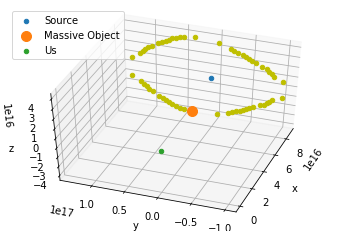

In [ ]:
BH_light(4.00*10**16, 4.681*10**16,1.989*10**30, .1)

In [ ]:
#angles= np.arange(0.00,3.14/2,0.02)
#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
#for i in angles:
  #l=round(i,2)
  # BH_light(4.000*10**16, 4.681*10**16, 1.989*10**30,l)
  
